In [10]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

exact_polytopes = True
folder_name = "m_4_r_3"
base_path = "data/"
base_filename = "normalization" #more_data #generalization_max_1000 #generalization #normalize #encoding 
max_experiments = 10

def find_filename(base_filename):
    i = 1
    while True:
        file_name = base_filename + "_" + "run" + "_" + str(i)
        if not os.path.exists("./runs/" + file_name + ".csv"):
            return i-1
        i += 1
        

run_id = find_filename(base_filename)
vector_data = []
vector_size = min(max_experiments, run_id)
vector_size = 1 if vector_size <= 0 else vector_size
print("Run ID: ", run_id)
print("Vector Size: ", vector_size)

dummy_id = find_filename("dummy")
vector_data_dummy = []
vector_size_dummy = min(max_experiments, dummy_id)
vector_size_dummy = 1 if vector_size_dummy <= 0 else vector_size_dummy
print("Dummy id", dummy_id)
print("Dummy Size", vector_size_dummy)

Run ID:  2
Vector Size:  2
Dummy id 4
Dummy Size 4


In [11]:
selected_indexes = [1,2,6,7]
dummy = False

#selected_indexes = [4]
#dummy = False

In [12]:

file_name = "/exact_politopes" if exact_polytopes else "/all_politopes"

x = np.load(base_path + folder_name + file_name + "_x.npy", allow_pickle=True)
y = np.load(base_path + folder_name + file_name+ "_y.npy", allow_pickle=True)


for i in range(run_id, run_id - vector_size, -1):
    tmp_name = base_filename + "_" + "run" + "_" + str(i) + ".csv"
    tmp_data = pd.read_csv("./runs/" + tmp_name)
    vector_data.append(tmp_data)


if dummy:
    for i in range(dummy_id, dummy_id - vector_size_dummy, -1):
        tmp_name = "dummy" + "_" + "run" + "_" + str(i) + ".csv"
        tmp_data = pd.read_csv("./runs/" + tmp_name)
        vector_data.append(tmp_data)


print("Mean: ", np.mean(y))
print("Std: ", np.std(y))
print("Std squared: ", np.mean(np.std(y)**2))

Mean:  251.6313172081867
Std:  144.3172390842364
Std squared:  20827.465496896653


In [13]:
#Best values for each run

for i in range(len(vector_data)):
    print("Run: ", run_id - i)
    #Get the index of the lowest value for the "dev_mse" column
    index_lowest = vector_data[i]["mean_error_dev"].idxmin()
    print("MSE train: ", vector_data[i]["mean_error_train"].iloc[index_lowest])
    print("MSE dev: ", vector_data[i]["mean_error_dev"].iloc[index_lowest])
    print("MSE test: ", vector_data[i]["mean_error_test"].iloc[index_lowest])
    print("------")
    
    

Run:  2
MSE train:  30.899510358164708
MSE dev:  53.91341434374451
MSE test:  52.24865819892288
------
Run:  1
MSE train:  28.229508769512176
MSE dev:  51.2431128205359
MSE test:  49.984643069416286
------


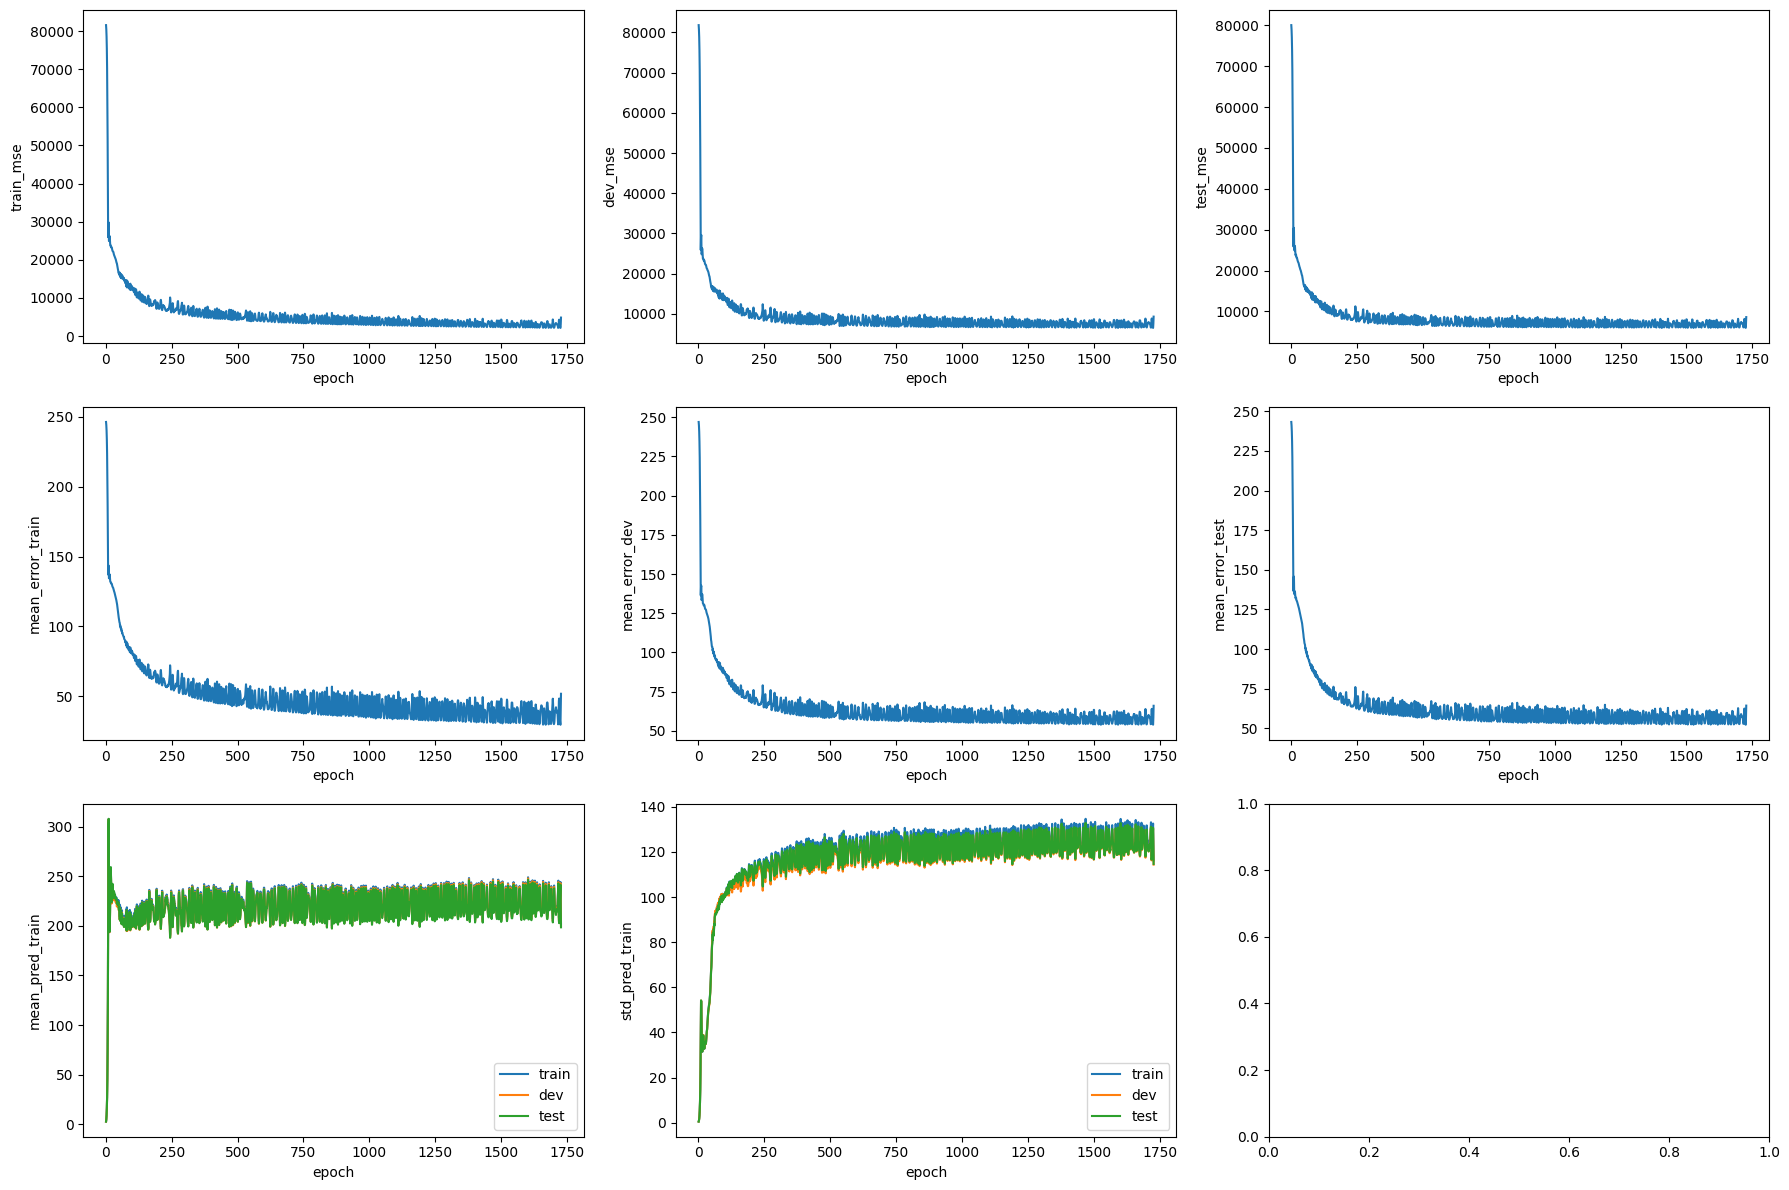

In [14]:
#Last run results


figure2, ax2 = plt.subplots(3, 3, figsize=(18, 12))

sns.lineplot(data=vector_data[0], x="epoch", y="train_mse", ax=ax2[0, 0])
sns.lineplot(data=vector_data[0], x="epoch", y="dev_mse", ax=ax2[0, 1])
sns.lineplot(data=vector_data[0], x="epoch", y="test_mse", ax=ax2[0, 2])


sns.lineplot(data=vector_data[0], x="epoch", y="mean_error_train", ax=ax2[1, 0])
sns.lineplot(data=vector_data[0], x="epoch", y="mean_error_dev", ax=ax2[1, 1])
sns.lineplot(data=vector_data[0], x="epoch", y="mean_error_test", ax=ax2[1, 2])

sns.lineplot(data=vector_data[0], x="epoch", y="mean_pred_train", ax=ax2[2, 0], label="train")
sns.lineplot(data=vector_data[0], x="epoch", y="mean_pred_dev", ax=ax2[2, 0], label="dev")
sns.lineplot(data=vector_data[0], x="epoch", y="mean_pred_test", ax=ax2[2, 0], label="test")

sns.lineplot(data=vector_data[0], x="epoch", y="std_pred_train", ax=ax2[2, 1], label="train")
sns.lineplot(data=vector_data[0], x="epoch", y="std_pred_dev", ax=ax2[2, 1], label="dev")
sns.lineplot(data=vector_data[0], x="epoch", y="std_pred_test", ax=ax2[2, 1], label="test")

figure2.tight_layout()



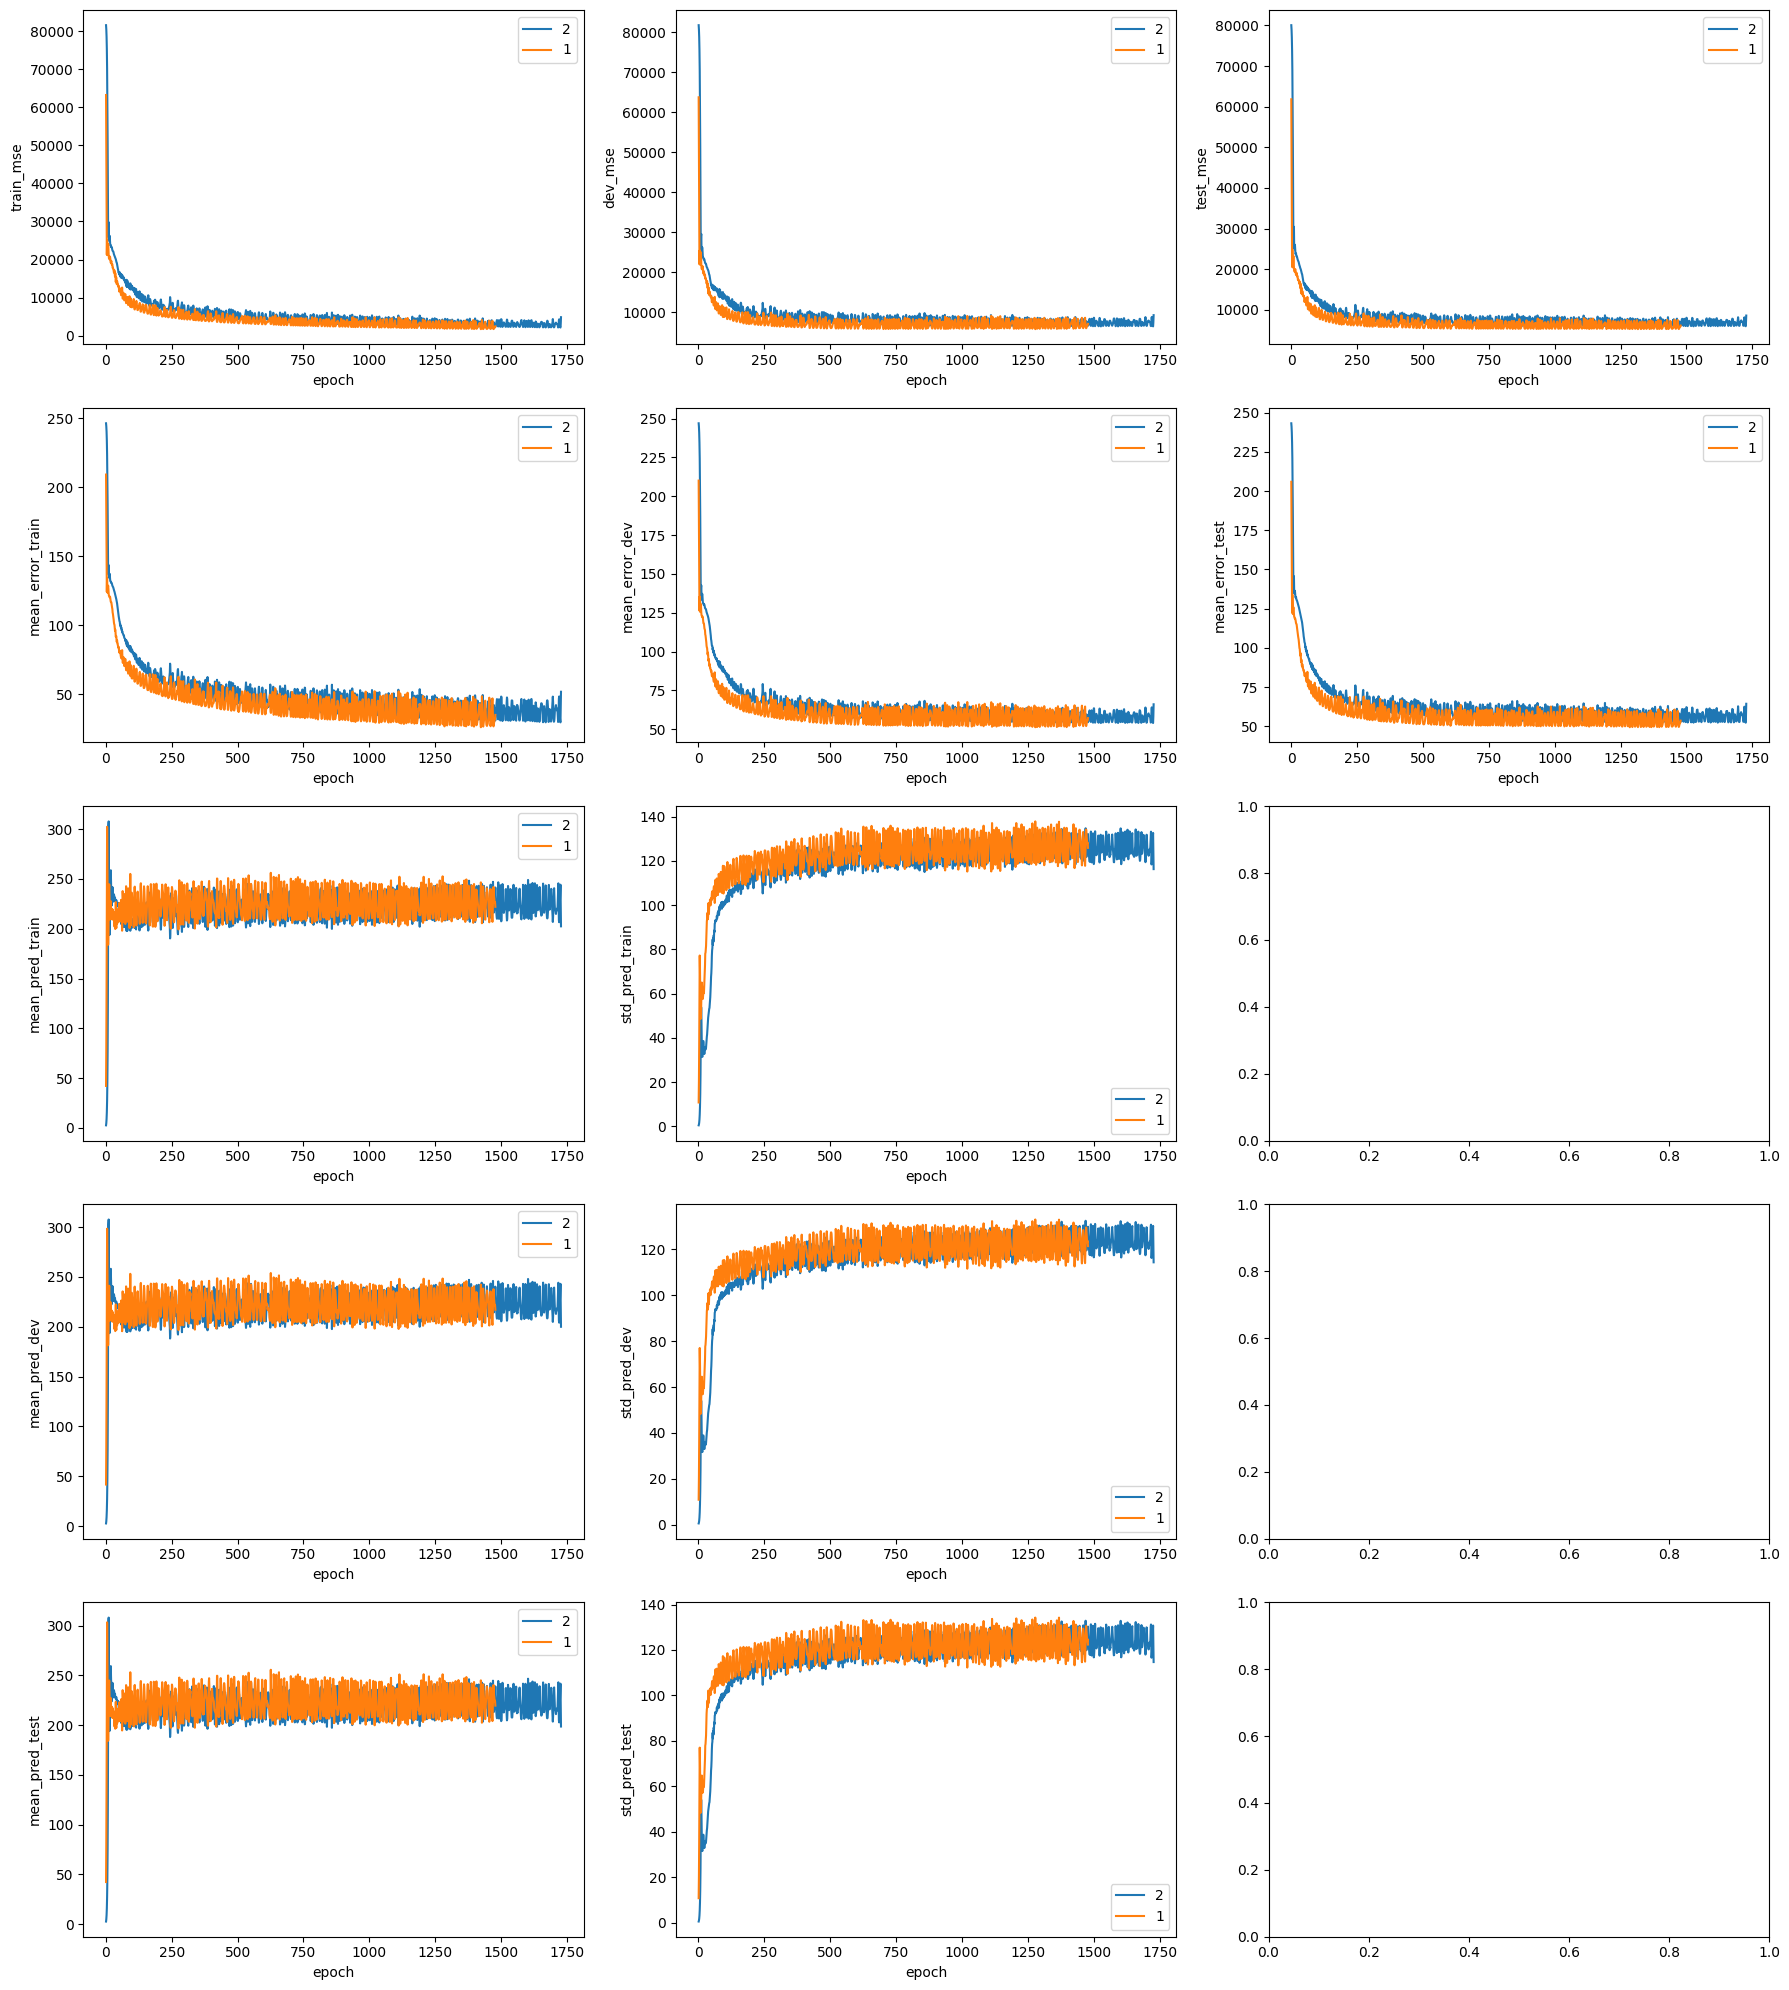

In [15]:
figure2, ax2 = plt.subplots(5, 3, figsize=(18, 20))

for i in range(len(vector_data)):
    
    if selected_indexes != []:
        if run_id - i not in selected_indexes and run_id - i > 0:
            continue
    
    sns.lineplot(data=vector_data[i], x="epoch", y="train_mse", ax=ax2[0, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="dev_mse", ax=ax2[0, 1], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="test_mse", ax=ax2[0, 2], label=run_id - i)
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_error_train", ax=ax2[1, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_error_dev", ax=ax2[1, 1], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_error_test", ax=ax2[1, 2], label=run_id - i)
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_pred_train", ax=ax2[2, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="std_pred_train", ax=ax2[2, 1], label=run_id - i)

    sns.lineplot(data=vector_data[i], x="epoch", y="mean_pred_dev", ax=ax2[3, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="std_pred_dev", ax=ax2[3, 1], label=run_id - i)
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_pred_test", ax=ax2[4, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="std_pred_test", ax=ax2[4, 1], label=run_id - i)

figure2.tight_layout()



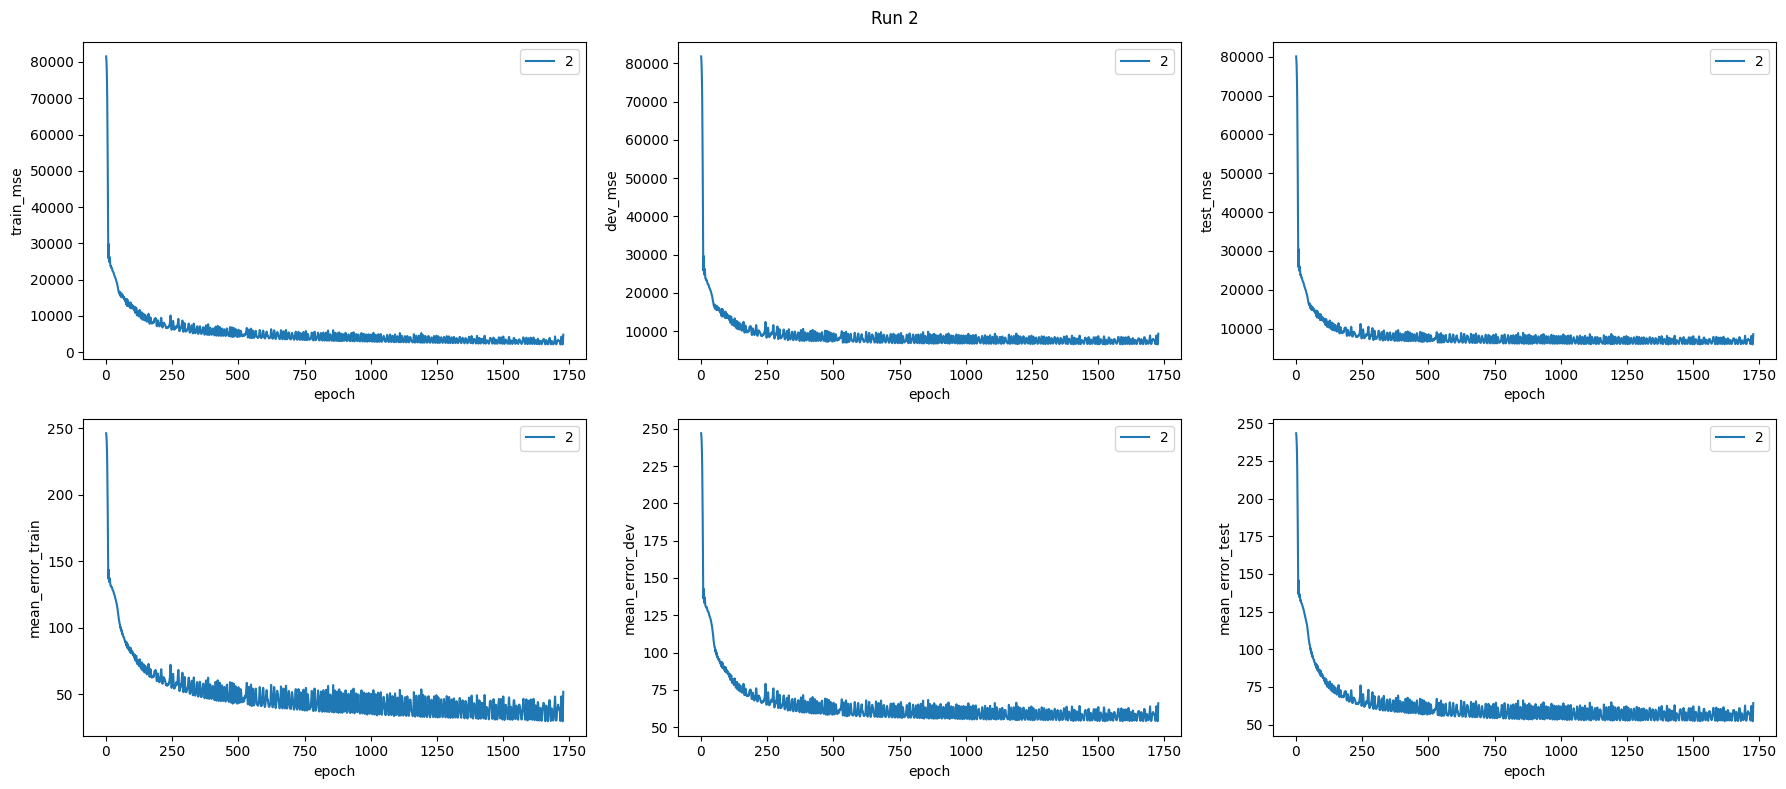

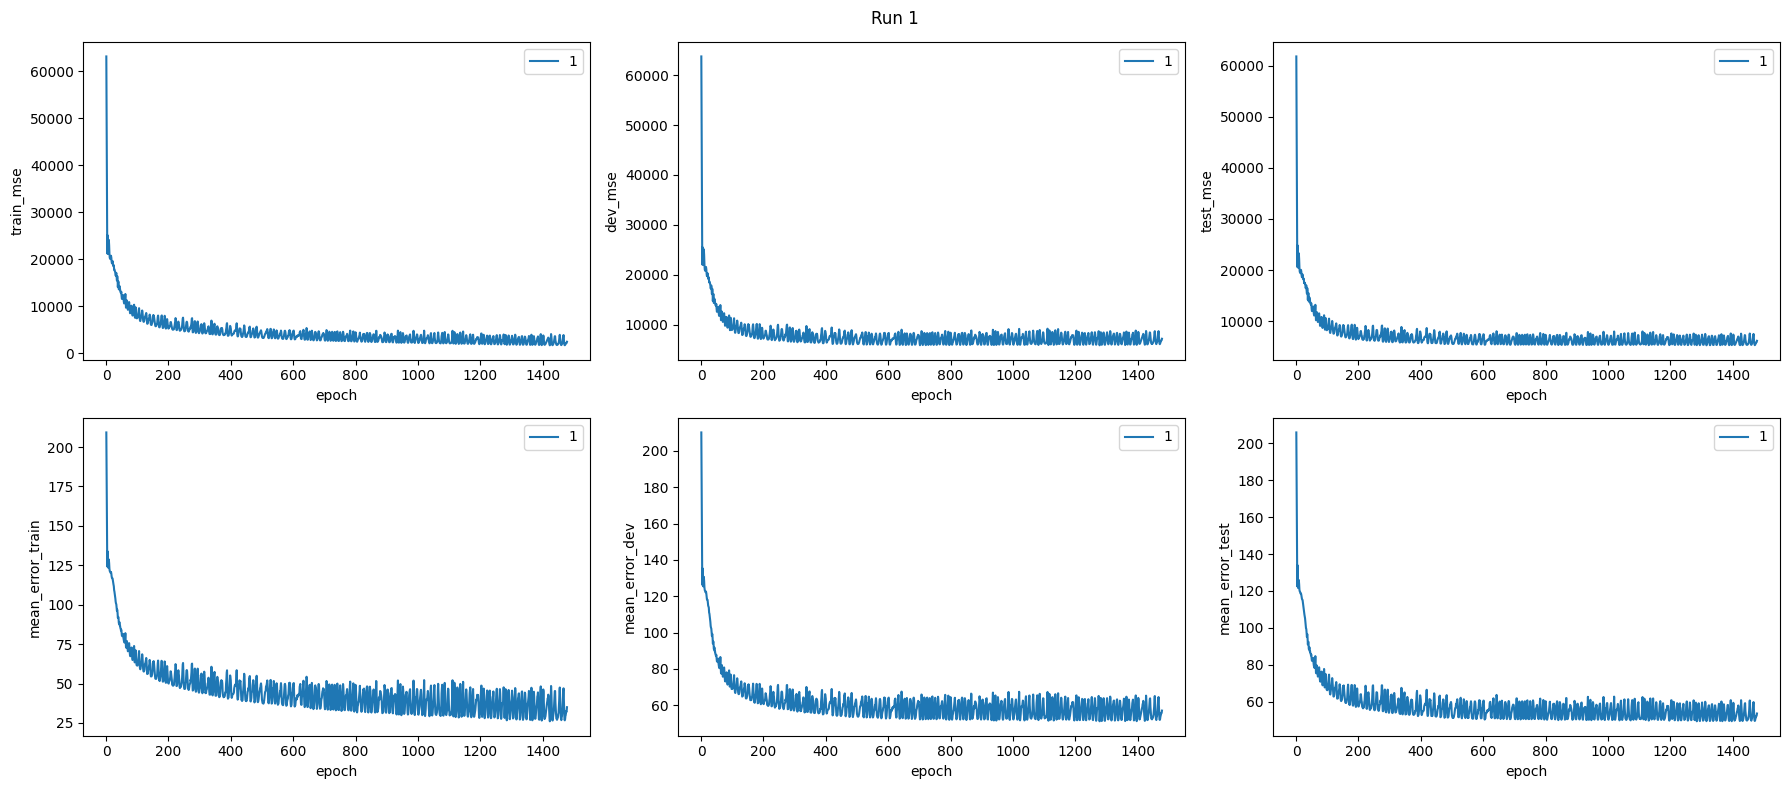

In [16]:
#All_detail runs

for i in range(len(vector_data)):
    if run_id - i <= 0:
        continue
    
    if selected_indexes != []:
        if run_id - i not in selected_indexes:
            continue
        
    figure2, ax2 = plt.subplots(2, 3, figsize=(18, 8))
    
    figure2.suptitle("Run " + str(run_id - i))

    sns.lineplot(data=vector_data[i], x="epoch", y="train_mse", ax=ax2[0, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="dev_mse", ax=ax2[0, 1], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="test_mse", ax=ax2[0, 2], label=run_id - i)
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_error_train", ax=ax2[1, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_error_dev", ax=ax2[1, 1], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_error_test", ax=ax2[1, 2], label=run_id - i)
    
    #ax2[1, 1].set_ylim(50, 80)
    #ax2[1, 2].set_ylim(50, 80)


    figure2.tight_layout()
    plt.show()
    

